In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_fscore_support

from models.MeTooDataset import MeTooDataset

In [2]:
labels = ['Against', 'Neutral', 'Favor']

In [3]:
experiment_name = '3C'

In [4]:
algorithm_name = 'tfidf'

# Training Setup

In [5]:
training_dataset = MeTooDataset(
    root='/Users/nmueller/Documents/Thesis/data/',
    mode='bag_of_words',
    task='stance_training',
    target='Objectification of Women'
)

In [6]:
testing_dataset = MeTooDataset(
    root='/Users/nmueller/Documents/Thesis/data/',
    mode='bag_of_words',
    task='stance_testing',
    target='Objectification of Women'
)

In [7]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

In [8]:
corpus = [
    *training_dataset.X, 
    *testing_dataset.X
]

In [9]:
X = vectorizer.fit_transform(corpus)

In [10]:
svm = LinearSVC(
    max_iter=10000, 
    verbose=1
)

# Training

In [11]:
svm.fit(
    X[:len(training_dataset.X)],
    training_dataset.y
)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

# Testing

In [12]:
predictions = svm.predict(X[len(training_dataset.X):])

In [13]:
df = pd.DataFrame.from_records(
        precision_recall_fscore_support(
            testing_dataset.y, 
            predictions
        )[:3], 
        index=['Precision', 'Recall', 'F1-Score'], 
        columns=[labels[idx] for idx in set(testing_dataset.y)]
    ).transpose()

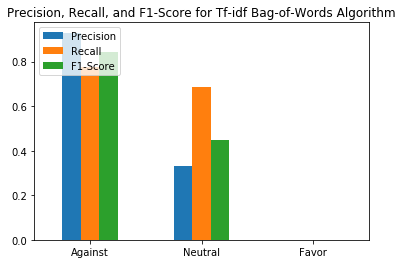

In [14]:
df.plot(kind='bar', title=f'Precision, Recall, and F1-Score for Tf-idf Bag-of-Words Algorithm', legend=True, rot=0)
plt.legend(loc='upper left')

with open(f'/Users/nmueller/Documents/Thesis/thesis-writing/thesis/img/{experiment_name}_{algorithm_name}.eps', 'wb') as f:
    plt.savefig(f, format='eps')

In [15]:
with open(f'/Users/nmueller/Documents/Thesis/thesis-writing/thesis/data/{experiment_name}_{algorithm_name}.tex', 'w', encoding='utf-8') as f:
    df.to_latex(f)